In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from ann_visualizer.visualize import ann_viz;

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from keras.layers import BatchNormalization, Activation, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.utils import plot_model

from livelossplot import PlotLossesKeras
import tensorflow as tf

BASE_DIR = '/media/abel/TERA/School/5to/IA/IA Project/fer2013'
TRAIN_DIR = os.path.join(BASE_DIR,'train')
TEST_DIR = os.path.join(BASE_DIR,'test')

total_train = 0
total_test = 0

for e in os.listdir(TRAIN_DIR):
    total_train +=  len(os.listdir(os.path.join(TRAIN_DIR,e)))

for e in os.listdir(TEST_DIR):
    total_test +=  len(os.listdir(os.path.join(TEST_DIR,e)))

print('train length:',total_train)
print('test length:',total_test)


train length: 28709
test length: 7178


In [2]:
img_size = 48
batch_size = 32
datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory(directory=TRAIN_DIR,
                                                 target_size=(img_size, img_size),
                                                 color_mode='grayscale',
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=True)
datagen_validation = ImageDataGenerator(horizontal_flip=True)

validation_generator=datagen_validation.flow_from_directory(directory=TEST_DIR,
                                                 target_size=(img_size, img_size),
                                                 color_mode='grayscale',
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [3]:
model = Sequential()
# 1 - conv
model.add(Conv2D(64,(5,5), padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# 2 - conv
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# 3 - conv
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# 4 - conv
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7,activation='softmax'))

opt=Adam(learning_rate=0.0005)
model.compile(optimizer=opt ,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

2022-06-30 15:44:48.445653: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-30 15:44:48.503915: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-30 15:44:48.504083: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-30 15:44:48.504996: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1664      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

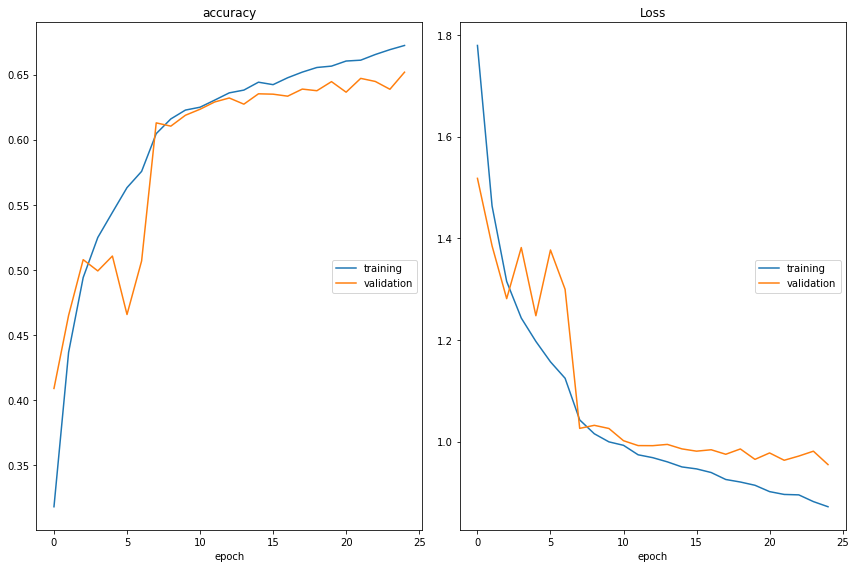

accuracy
	training         	 (min:    0.318, max:    0.672, cur:    0.672)
	validation       	 (min:    0.409, max:    0.652, cur:    0.652)
Loss
	training         	 (min:    0.872, max:    1.779, cur:    0.872)
	validation       	 (min:    0.955, max:    1.518, cur:    0.955)

Epoch 25: saving model to model_weights.h5
897/897 [==============================] - 17s 19ms/step - loss: 0.8718 - accuracy: 0.6723 - val_loss: 0.9547 - val_accuracy: 0.6518 - lr: 1.0000e-05


In [4]:

epochs= 25
steps_per_epoch=train_generator.n//train_generator.batch_size
validation_steps=validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                            save_weights_only=True, mode='max', verbose=1)
reduce_lr= ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.00001, mode='auto')
callbacks = [ PlotLossesKeras(),checkpoint, reduce_lr]

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)


In [12]:
# ann_viz(model, title="Convolutional Neural Network for emotions recognition")
model.save('emotions_rec_2.h5')
model.save('CNN_emotions.model')

# model_json = model.to_json()
# with open("model.json","w") as json_file:
#     json_file.write(model_json)
    

INFO:tensorflow:Assets written to: CNN_emotions.model/assets


INFO:tensorflow:Assets written to: CNN_emotions.model/assets


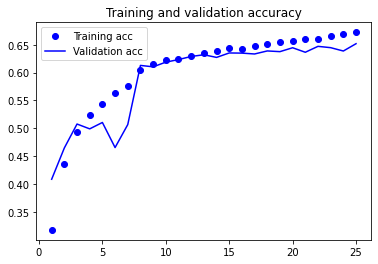

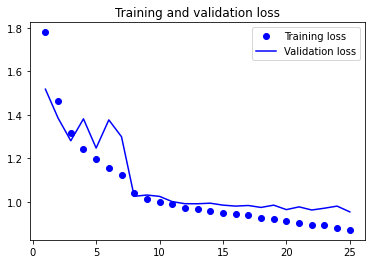

In [5]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Testing the model

In [7]:
score = model.evaluate(validation_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

225/225 [==============================] - 3s 15ms/step - loss: 0.9542 - accuracy: 0.6534
Test loss: 0.95416259765625
Test accuracy: 0.65338534116745


In [15]:
My_TFlite_Model = tf.keras.models.load_model('emotions_rec_2.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(My_TFlite_Model)
tflite_model = converter.convert()
open("CNN_Flite_Model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpgj16v_3n/assets


INFO:tensorflow:Assets written to: /tmp/tmpgj16v_3n/assets
2022-06-30 03:56:58.368373: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-06-30 03:56:58.368400: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-06-30 03:56:58.369156: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmpgj16v_3n
2022-06-30 03:56:58.374964: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-06-30 03:56:58.374993: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /tmp/tmpgj16v_3n
2022-06-30 03:56:58.390173: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2022-06-30 03:56:58.394599: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-06-30 03:56:58.553106: I tensorflow/cc/saved_model/loader.cc:212] Running initializatio

17893652